In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from math import sin, cos, sqrt, atan2, radians
import geopandas as gpd
import geoplot as gplt

In [2]:
def get_result(query):
    conn = sqlite3.connect("olist.db")
    cursor = conn.cursor()
    cursor.execute(query)
    data1 = cursor.fetchall()
    conn.close()
    return data1

def create_df(data1, columns):
    return pd.DataFrame(data=data1, columns=columns).drop(['index'], axis=1)

In [3]:
# Convert each table into DataFrame
customers = create_df(
                get_result(
                    "SELECT * FROM olist_order_customer_dataset"
                    ),
                ["index",
                "customers_id",
                "customers_uniq_id",
                "customer_zip_code_prefix",
                "customer_city",
                "customer_state"]
                )
geolocation = create_df(
                get_result(
                    "SELECT * FROM olist_geolocation_dataset"
                    ),
                ['index',
                 'geolocation_zip_code_prefix',
                 'geolocation_lat',
                 'geolocation_lng',
                 'geolocation_city',
                 'geolocation_state']
                )
order_items = create_df(
                get_result(
                    "SELECT * FROM olist_order_items_dataset"
                ),
                ['index',
                 'order_id',
                 'order_item_id',
                 'product_id',
                 'seller_id',
                 'shipping_limit_date',
                 'price',
                 'freight_value']
                )
order_payments = create_df(
                    get_result(
                        "SELECT * FROM olist_order_payments_dataset"
                        ),
                    ['index',
                     'order_id',
                     'payment_sequentil',
                     'payment_type',
                     'payment_installments',
                     'payment_value']
                    )
order_reviews = create_df(
                    get_result(
                        "SELECT * FROM olist_order_reviews_dataset"
                        ),
                    ["index",
                     "review_id",
                     "order_id",
                     "review_score", 
                     "review_comment_title", 
                     "review_comment_message",                         
                     "review_creation_date", 
                     "review_answer_timestamp"]
                    )
orders = create_df(
                get_result(
                    "SELECT * FROM olist_order_dataset"
                    ),
                ['index',
                 'order_id',
                 'customer_id',
                 'order_status',
                 'order_purchase_timestamp',
                 'order_approved_at',
                 'order_delivered_carrier_date',
                 'order_delivered_customer_date',
                 'order_estimated_delivery_date']
                )
products = create_df(
                get_result(
                    "SELECT * FROM olist_products_dataset"
                    ),
                ['index',
                 'product_id',
                 'product_category_name',
                 'product_name_lenght',
                 'product_description_lenght',
                 'product_photos_qty',
                 'product_weight_g',
                 'product_lenght_cm',
                 'product_height_cm',
                 'product_width_cm']
                )
seller = create_df(
                get_result(
                    "SELECT * FROM olist_sellers_dataset"
                    ),
                ['index',
                 'seller_id',
                 'seller_zip_code_prefix',
                 'seller_city',
                 'seller_state']
                )
product_category_eng = create_df(
                get_result(
                    "SELECT * FROM product_category_name_translation"
                    ),
                ['index',
                 'product_category_name',
                 'product_category_name_english',]
                )
order_reviews_translated = pd.read_csv('reviews_translated.csv')

In [4]:
order_reviews_translated.drop('Unnamed: 0', axis=1)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,I received it well before the stipulated time.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Congratulations Lannister stores I loved shopp...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excellent backpack, super fast delivery. I hig...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


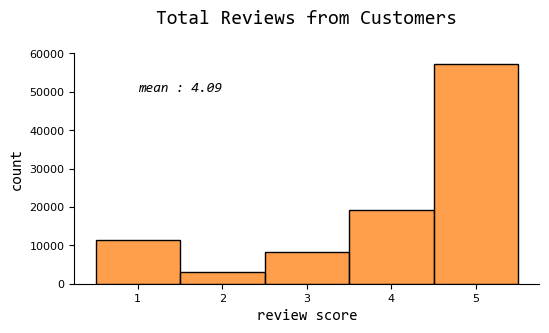

In [5]:
# Create figure of customer reviews hist. plot
fig, ax = plt.subplots(figsize=(6,3))

sns.histplot(data=order_reviews, 
             x='review_score', 
             color='tab:orange', 
             discrete=True)
sns.despine()

# Customizing the figure
ax.text(1, 50000, 
        f"mean : {order_reviews['review_score'].mean():.2f}", 
        fontstyle='oblique', 
        fontfamily='Consolas')
ax.set_title('Total Reviews from Customers\n', fontsize=14, fontdict={'family' : 'consolas'})
ax.set_xlabel('review score', fontsize=11, fontdict={'family' : 'consolas'})
ax.set_ylabel('count', fontsize=11, fontdict={'family' : 'consolas'})

plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

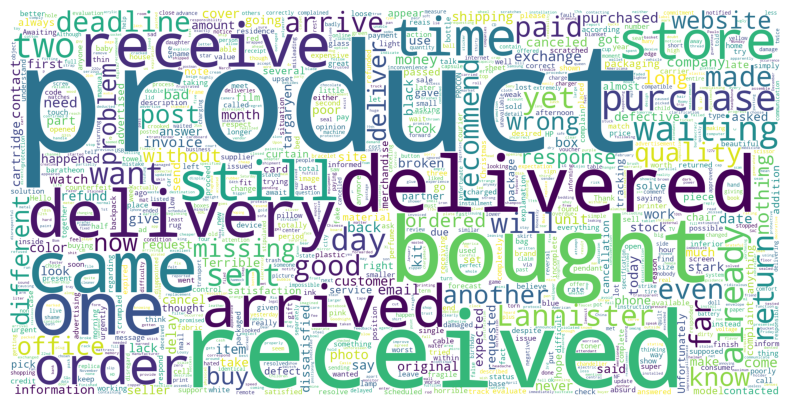

In [6]:
# Select/filter the bad reviews only
bad_reviews = order_reviews_translated[order_reviews_translated['review_score'] <= 2]

# Create a single long text from review comment message 
coments = ' '.join(map(str, bad_reviews['review_comment_message'].dropna()))

# Visualize the comments
wc = WordCloud(height=1000,
               width=2000, 
               collocations = False,
               background_color='white', 
               stopwords=STOPWORDS, 
               min_font_size=6,
               max_words=5000).generate(coments)

plt.figure(figsize=(10,5))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [7]:
# Delete unnecessary columns for analysis
order_reviews = order_reviews.drop('review_comment_title', axis=1)
order_reviews = order_reviews.drop('review_answer_timestamp', axis=1)

# Change review_creation_date into datetime64 format
order_reviews['review_creation_date'] = pd.to_datetime(order_reviews['review_creation_date'], yearfirst=True)

In [8]:
product_reviews_temp = pd.merge(order_reviews, 
                                order_items[['order_id', 'order_item_id', 'product_id']], 
                                on='order_id', 
                                how='left')
product_reviews_temp = product_reviews_temp[product_reviews_temp['order_item_id'] == 1]

In [9]:
product_reviews_temp2 = pd.merge(product_reviews_temp, 
                                 products[['product_id', 'product_category_name']], 
                                 on='product_id', 
                                 how='left')
product_reviews_temp3 = pd.merge(product_reviews_temp2, 
                                 product_category_eng, 
                                 on='product_category_name', 
                                 how='left')
product_reviews = pd.DataFrame(product_reviews_temp3
                            .groupby('product_category_name_english')['review_score']
                            .mean()
                            .sort_values(ascending=False)
                            ).reset_index()

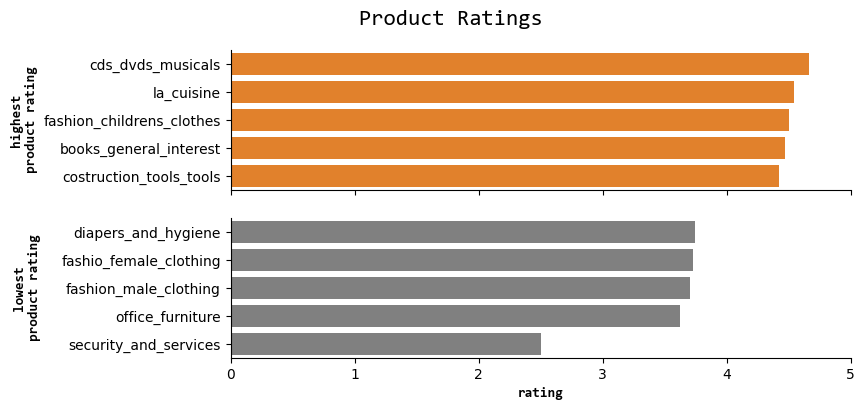

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,4), sharex=True)
fig.suptitle('Product Ratings\n', x=0.4, size=16, fontdict={'weight' : 'bold', 'family' : 'consolas'})

sns.barplot(data=product_reviews
            .nlargest(5, 'review_score')
            .sort_values(by='review_score', ascending=False), 
            x='review_score', 
            y='product_category_name_english',
            color='tab:orange',
            ax= ax[0])
ax[0].set_ylabel('highest\nproduct rating',
                 fontdict={
                 'weight':'bold',
                 'family' : 'consolas'})
ax[0].set_xlabel('')


sns.barplot(data=product_reviews
            .nsmallest(5, 'review_score')
            .sort_values(by='review_score', ascending=False), 
            x='review_score', 
            y='product_category_name_english',
            color='grey',
            ax= ax[1])
ax[1].set_ylabel('lowest\nproduct rating\n',
                 fontdict={
                  'weight':'bold',
                  'family' : 'consolas'})
ax[1].set_xlabel('rating',
                 fontdict={
                  'weight':'bold',
                  'family' : 'consolas'})
ax[1].set_xlim(0,5)

sns.despine()
plt.show()

In [11]:
orders = orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], axis=0).reset_index(drop=True)
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['delivery_time_days'] = (orders['order_delivered_customer_date'] - orders['order_approved_at']).dt.days

In [12]:
delivery_time = orders[['order_id', 'delivery_time_days']]
delivery_time_reviews = pd.merge(delivery_time, order_reviews, on='order_id', how='left')

Text(-0.5, 80, 'mean : 11.65 days')

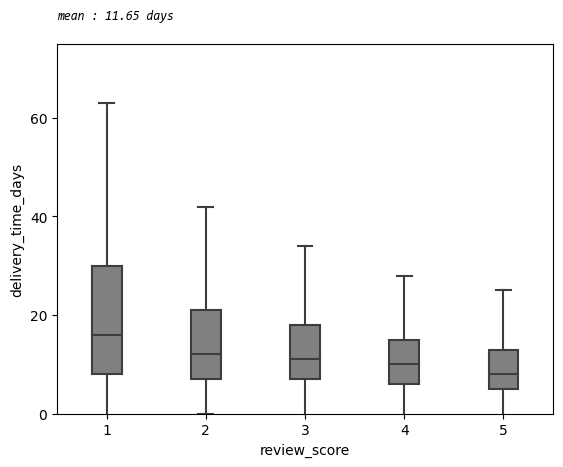

In [13]:
fig, ax = plt.subplots()

sns.boxplot(data=delivery_time_reviews.sort_values(by='review_score', ascending=False), 
            x='review_score',
            y='delivery_time_days', 
            orient='v',
            order=[1, 2, 3, 4, 5],
            fliersize=1,
            showfliers=False,
            boxprops={'facecolor': 'grey'},
            width=0.3)

ax.set_ylim(0,75)
ax.set_yticks([0, 20, 40, 60])
ax.text(-0.5, 80, 
        f"mean : {delivery_time_reviews['delivery_time_days'].mean():.2f} days", 
        fontstyle='oblique',
        fontfamily='Consolas',
        fontsize=9)

In [14]:
# Spesify coordinate
geolocation_unique = geolocation.drop_duplicates(subset=['geolocation_zip_code_prefix'])
geolocation_unique.reset_index()

,index,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,0,1037,-23.545621,-46.639292,sao paulo,SP
1,1,1046,-23.546081,-46.644820,sao paulo,SP
2,3,1041,-23.544392,-46.639499,sao paulo,SP
3,4,1035,-23.541578,-46.641607,sao paulo,SP
4,5,1012,-23.547762,-46.635361,são paulo,SP
...,...,...,...,...,...,...
19010,999774,99955,-28.107588,-52.144019,vila langaro,RS
19011,999780,99970,-28.345143,-51.876926,ciriaco,RS
19012,999786,99910,-27.863500,-52.084760,floriano peixoto,RS
19013,999803,99920,-27.858716,-52.300403,erebango,RS


In [15]:
# Create temporary merged table to get distance information
product_delivery_temp = pd.merge(delivery_time, order_items[['order_id', 'product_id', 'order_item_id', 'seller_id']], on='order_id', how='left')
product_delivery_temp2 = pd.merge(product_delivery_temp, products[['product_id', 'product_category_name', 'product_weight_g', 'product_lenght_cm', 'product_width_cm', 'product_height_cm']], on='product_id', how='left')
product_delivery_temp3 = pd.merge(product_delivery_temp2, orders[['order_id', 'customer_id']], on='order_id', how='left')
product_delivery_temp4 = pd.merge(product_delivery_temp3, product_category_eng, on='product_category_name', how='left')
product_delivery_temp5 = pd.merge(product_delivery_temp4, customers[['customers_id', 'customer_zip_code_prefix']], left_on='customer_id', right_on='customers_id', how='left')
product_delivery_temp6 = pd.merge(product_delivery_temp5, seller[['seller_id', 'seller_zip_code_prefix']], on='seller_id', how='left')

# Create new column of product dimension
product_delivery_temp6['dimension_cm3'] = product_delivery_temp6['product_lenght_cm'] * product_delivery_temp6['product_width_cm'] * product_delivery_temp6['product_height_cm']

# Re order table columns of product_delivery_temp6 DataFrame
product_delivery_temp6 = product_delivery_temp6.drop_duplicates(subset=['order_id']).reset_index()
product_delivery_temp6 = product_delivery_temp6[['order_id', 
                                     'seller_id',
                                     'customer_id',
                                     'product_id',
                                     'product_category_name_english',
                                     'delivery_time_days',
                                     'product_weight_g',
                                     'dimension_cm3',
                                     'seller_zip_code_prefix',
                                     'customer_zip_code_prefix'
                                     ]]

product_delivery_temp7 = pd.merge(product_delivery_temp6, geolocation_unique[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_state']], left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')

# Distinguish column name between customer and seller coordinate
product_delivery_temp7.rename(columns=({'geolocation_lat' : 'seller_lat', 'geolocation_lng' : 'seller_lng', 'geolocation_state':'seller_state'}), inplace=True)

# Final merged table contains information needed
product_delivery = pd.merge(product_delivery_temp7, geolocation_unique[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_state']], left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')
product_delivery.rename(columns=({'geolocation_lat' : 'customer_lat', 'geolocation_lng' : 'customer_lng', 'geolocation_state' : 'customer_state'}), inplace=True)
product_delivery = product_delivery.drop(['geolocation_zip_code_prefix_x', 'geolocation_zip_code_prefix_y'], axis=1)


In [16]:
# Measure the distance of delivery from seller to customer
distance_series = []

for i in product_delivery.index:
    seller_lat = product_delivery.loc[i, 'seller_lat']
    customer_lat = product_delivery.loc[i, 'customer_lat']
    seller_lng = product_delivery.loc[i, 'seller_lng']
    customer_lng = product_delivery.loc[i, 'customer_lng']
    
    R = 6373.0 # approximate radius of earth in km
    lat1 = radians(seller_lat)
    lat2 = radians(customer_lat)
    lon1 = radians(seller_lng)
    lon2 = radians(customer_lng)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon /2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    result_distance = R * c
    distance_series.append(result_distance)

order_distance = pd.Series(distance_series)

In [17]:
# Create new colums of order distances
product_delivery = product_delivery.assign(order_distance_km = order_distance.values)

In [18]:
# Create dataframe for correlation analysis
delivery_corr = product_delivery[['product_weight_g',
                                  'dimension_cm3',
                                  'order_distance_km',
                                  'delivery_time_days']]

delivery_corr = delivery_corr.corr()

<Axes: >

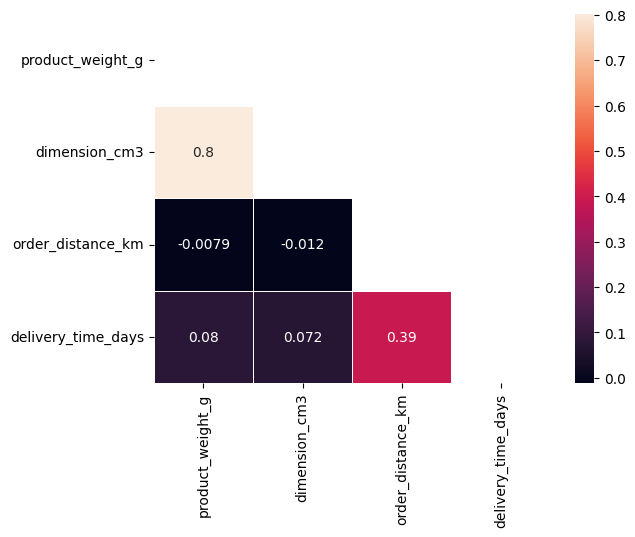

In [19]:
# Visualize the correlation between delivery time and some factors
mask = np.zeros_like(delivery_corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(delivery_corr, annot=True, mask=mask, linewidth=.5)

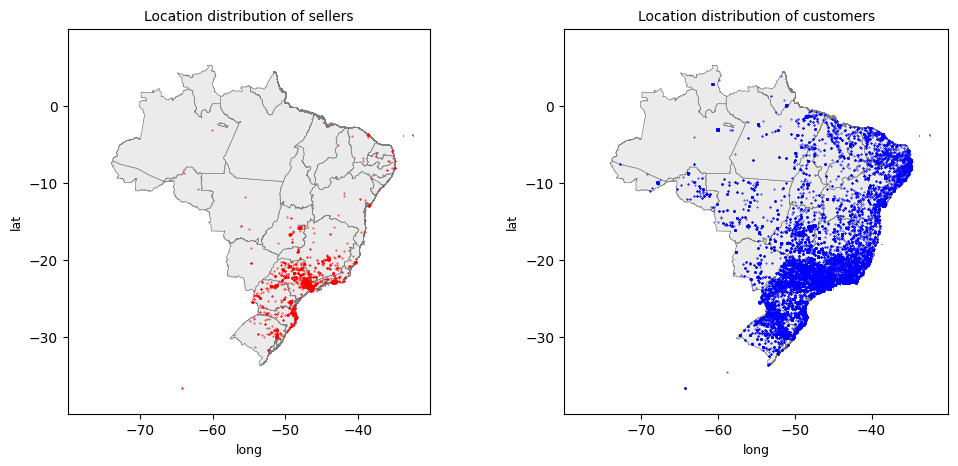

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

# Create dataframe to plotting Brazil state map
seller_coordinates = product_delivery[['seller_id', 'seller_lng', 'seller_lat', 'seller_state']]
customer_coordinates = product_delivery[['customer_id', 'customer_lng', 'customer_lat', 'customer_state']]

# Create data point of customer and seller locartion
seller_map_points = gpd.GeoDataFrame(seller_coordinates, 
                                     geometry=gpd.points_from_xy(seller_coordinates['seller_lng'], 
                                                                 seller_coordinates['seller_lat']), 
                                                                 crs='EPSG:4326')
customer_map_points = gpd.GeoDataFrame(customer_coordinates, 
                                       geometry=gpd.points_from_xy(customer_coordinates['customer_lng'], 
                                                                   customer_coordinates['customer_lat']), 
                                                                   crs='EPSG:4326' )

# Remove duplicate data
seller_map_points = seller_map_points.drop_duplicates(subset='seller_id', ignore_index=True)
customer_map_points = customer_map_points.drop_duplicates(subset='customer_id', ignore_index=True)

# Create base map
uf_bra = gpd.read_file('shp_bra/gadm36_BRA_1.shp')
uf_bra.plot(color=(0.92, 0.92, 0.92), edgecolor='grey', linewidth=0.5, ax=ax[0])
uf_bra.plot(color=(0.92, 0.92, 0.92), edgecolor='grey', linewidth=0.5, ax=ax[1])

# Plotting seller and customer locations
seller_map_points['geometry'].plot(ax = ax[0], marker='.', color='red', markersize=0.5)
customer_map_points['geometry'].plot(ax = ax[1], marker='.', color='blue', markersize=0.5)

ax[0].set_title('Location distribution of sellers', fontsize=10)
ax[0].set_xlabel('long', fontsize=9)
ax[0].set_ylabel('lat', fontsize=9)
ax[0].set_xlim(-80, -30)
ax[0].set_ylim(-40, 10)
ax[0].set_xticks([-70, -60, -50, -40])
ax[0].set_yticks([-30, -20, -10, 0])

ax[1].set_title('Location distribution of customers', fontsize=10)
ax[1].set_xlabel('long', fontsize=9)
ax[1].set_ylabel('lat', fontsize=9)
ax[1].set_xlim(-80, -30)
ax[1].set_ylim(-40, 10)
ax[1].set_xticks([-70, -60, -50, -40])
ax[1].set_yticks([-30, -20, -10, 0])
